## 決策樹學習 - 分類樹 (以RR Lyrae變星資料集為例)
* [程式碼來源](http://www.astroml.org/book_figures/chapter9/fig_rrlyrae_decisiontree.html#book-fig-chapter9-fig-rrlyrae-decisiontree)

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from astroML.datasets import fetch_rrlyrae_combined
from astroML.utils import split_samples
from astroML.utils import completeness_contamination


#fetch_rrlyrae_combined?
X, y = fetch_rrlyrae_combined() # 合併RR Lyrae變星和標準星的colors資訊
print('Features (u-g, g-r, r-i, i-z colors): ')
print(X)
print('Labels (標準星-0; RR Lyrae變星-1): ')
print(y)

Features (u-g, g-r, r-i, i-z colors): 
[[ 1.25099945  0.39400005  0.13700008  0.06199932]
 [ 1.04800034  0.3390007   0.15199852  0.02300072]
 [ 1.00800133  0.34199905  0.12899971  0.20300102]
 ..., 
 [ 1.04400063  0.21199989  0.03499985  0.00200081]
 [ 1.06499863  0.17200089  0.04199982  0.00300026]
 [ 1.12599945  0.06500053 -0.0170002  -0.05799866]]
Labels (標準星-0; RR Lyrae變星-1): 
[ 0.  0.  0. ...,  1.  1.  1.]


In [2]:
X = X[:, [1, 0, 2, 3]]  # rearrange columns for better 1-color results
(X_train, X_test), (y_train, y_test) = split_samples(X, y, [0.75, 0.25],
                                                     random_state=0)
N_tot = len(y)
N_st = np.sum(y == 0)
N_rr = N_tot - N_st
N_train = len(y_train)
N_test = len(y_test)
N_plot = 5000 + N_rr

<IPython.core.display.Javascript object>


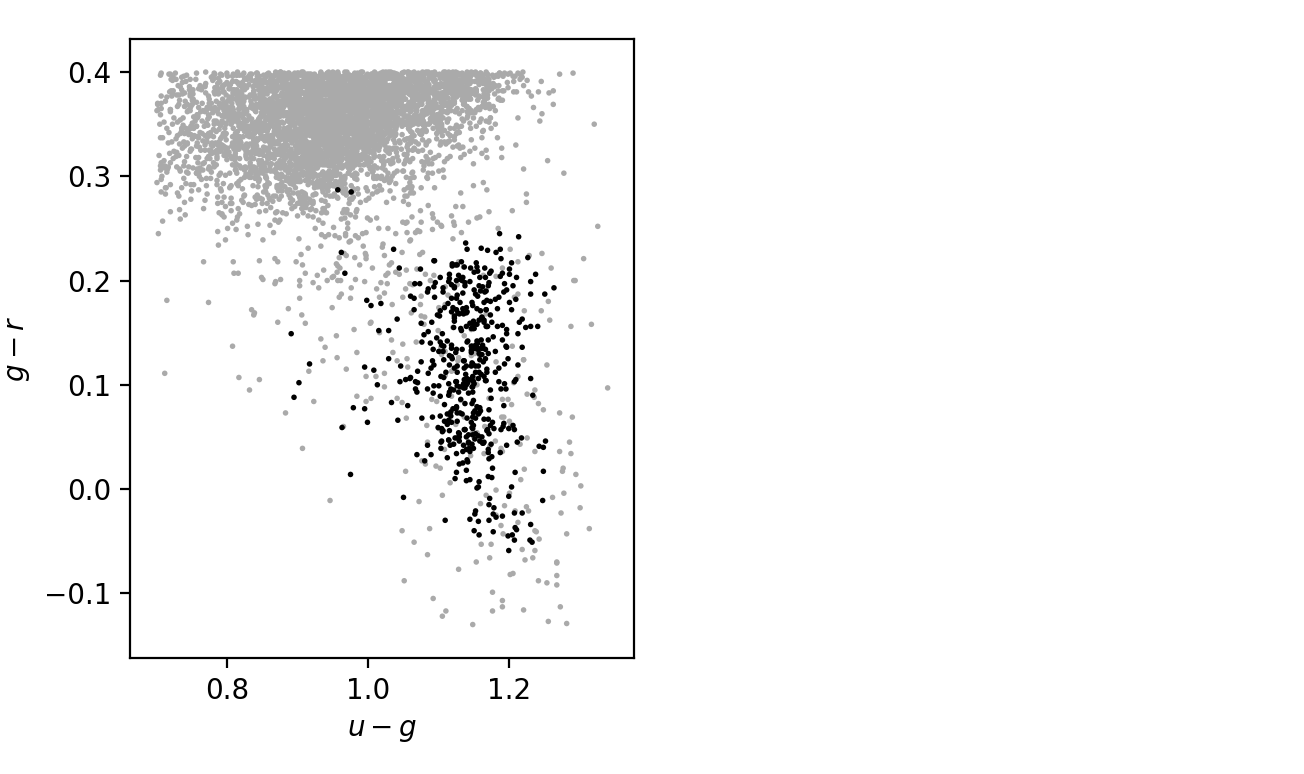

In [3]:
%matplotlib notebook
# plot the results
fig = plt.figure(figsize=(5, 2.5))
fig.subplots_adjust(bottom=0.15, top=0.95, hspace=0.0,
                    left=0.1, right=0.95, wspace=0.2)

# left plot: data and decision boundary
ax = fig.add_subplot(121)
im = ax.scatter(X[-N_plot:, 1], X[-N_plot:, 0], c=y[-N_plot:],
                s=4, lw=0, cmap=plt.cm.binary, zorder=2)
im.set_clim(-0.5, 1)

#ax.contour(xx, yy, Z, [0.5], colors='k')

# ax.set_xlim(xlim)
# ax.set_ylim(ylim)

ax.set_xlabel('$u-g$')
ax.set_ylabel('$g-r$')
plt.show()
# ax.text(0.02, 0.02, "depth = %i" % depths[1],
#         transform=ax.transAxes)